In [1]:
# importing relevent libraries
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

In [2]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# loading the cleaned dataset
data = pd.read_csv('/content/drive/MyDrive/icu_data.csv')
data.head()

,hospital_death,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,...,isin_metabolic,isin_musculoskeletal/skin,isin_neurological,isin_respiratory,isin_sepsis,isin_trauma,isin_haematologic,isin_neurologic,isin_renal/genitourinary,isin_undefined diagnoses
0,0,68.0,22.730000,0,180.3,0.541667,73.9,113.0,502.01,0,...,0,0,0,0,1,0,0,0,0,0
1,0,77.0,27.420000,0,160.0,0.927778,70.2,108.0,203.01,0,...,0,0,0,1,0,0,0,0,0,0
2,0,67.0,27.560000,0,190.5,0.000694,100.0,301.0,403.01,0,...,0,0,1,0,0,0,0,1,0,0
3,0,46.0,25.845717,0,167.6,0.000000,72.6,108.0,203.01,0,...,0,0,0,1,0,0,0,0,0,0
4,0,87.0,21.963763,0,180.3,5.046528,71.4,113.0,501.05,0,...,0,0,0,0,1,0,0,0,0,0


In [4]:
data['hospital_death']

0        0
1        0
2        0
3        0
4        0
        ..
53108    0
53109    0
53110    0
53111    0
53112    0
Name: hospital_death, Length: 53113, dtype: int64

In [5]:
# separating target and predictor variables
data_y = data['hospital_death']
data_x = data.drop('hospital_death',axis=1)

In [6]:
data_x.head()

,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,...,isin_metabolic,isin_musculoskeletal/skin,isin_neurological,isin_respiratory,isin_sepsis,isin_trauma,isin_haematologic,isin_neurologic,isin_renal/genitourinary,isin_undefined diagnoses
0,68.0,22.730000,0,180.3,0.541667,73.9,113.0,502.01,0,0,...,0,0,0,0,1,0,0,0,0,0
1,77.0,27.420000,0,160.0,0.927778,70.2,108.0,203.01,0,0,...,0,0,0,1,0,0,0,0,0,0
2,67.0,27.560000,0,190.5,0.000694,100.0,301.0,403.01,0,0,...,0,0,1,0,0,0,0,1,0,0
3,46.0,25.845717,0,167.6,0.000000,72.6,108.0,203.01,0,0,...,0,0,0,1,0,0,0,0,0,0
4,87.0,21.963763,0,180.3,5.046528,71.4,113.0,501.05,0,0,...,0,0,0,0,1,0,0,0,0,0


In [7]:
data_y.value_counts()

0    48461
1     4652
Name: hospital_death, dtype: int64

In [8]:
# splitting the dataset into train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y,  test_size=0.2, shuffle = True, random_state = 8)

In [9]:
X_train.shape, X_test.shape

((42490, 129), (10623, 129))

In [10]:
pd.set_option('display.max_columns', None)

In [11]:
X_train.head()

,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,isin_african american,isin_asian,isin_caucasian,isin_hispanic,isin_native american,isin_other/unknown,isin_f,isin_m,isin_ccu-cticu,isin_csicu,isin_cticu,isin_cardiac icu,isin_micu,isin_med-surg icu,isin_neuro icu,isin_sicu,isin_cardiovascular,isin_gastrointestinal,isin_genitourinary,isin_gynecological,isin_hematological,isin_metabolic,isin_musculoskeletal/skin,isin_neurological,isin_respiratory,isin_sepsis,isin_trauma,isin_haematologic,isin_neurologic,isin_renal/genitourinary,isin_undefined diagnoses
28981,69.0,31.972318,1,170.0,2.662500,92.4,308.0,1207.01,1,0,7.0,0.60,3.0,6.0,0,3.0,127.0,91.0,28.2,1,57.0,29.0,138.0,36.8,1,14.90,67.0,41.0,67.0,41.0,91.0,80.0,73.0,57.0,73.0,57.0,29.0,12.0,100.0,92.0,127.0,94.0,127.0,94.0,37.1,36.7,62.0,55.0,62.0,55.0,91.0,90.0,73.0,68.0,73.0,68.0,23.0,12.0,99.0,98.0,127.0,105.0,127.0,105.0,37.1,36.9,8.0,7.0,8.1,8.1,0.69,0.60,127.0,105.0,20.0,20.0,13.3,8.6,39.0,27.0,245.0,227.0,4.5,3.8,140.0,138.0,16.50,11.50,0.01,0.00,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34168,43.0,42.292992,0,167.6,0.169444,118.8,113.0,501.05,0,0,9.0,0.51,4.0,6.0,0,5.0,184.0,101.0,42.2,0,134.0,39.0,132.0,35.8,1,13.75,123.0,78.0,123.0,78.0,100.0,41.0,134.0,89.0,134.0,89.0,47.0,16.0,98.0,82.0,181.0,125.0,181.0,125.0,36.2,35.8,112.0,93.0,112.0,93.0,91.0,59.0,127.0,106.0,127.0,106.0,26.0,19.0,98.0,89.0,172.0,135.0,172.0,135.0,36.2,36.2,9.0,9.0,8.8,8.8,0.51,0.51,207.0,147.0,26.0,26.0,13.7,13.7,42.2,42.2,294.0,294.0,4.7,4.7,132.0,132.0,13.75,13.75,0.05,0.03,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
17273,30.0,21.527821,0,152.4,-0.004167,50.0,123.0,702.01,0,0,18.0,0.76,4.0,6.0,0,5.0,298.0,139.0,40.1,0,71.0,29.0,140.0,36.7,0,12.70,81.0,57.0,81.0,57.0,134.0,93.0,101.0,71.0,101.0,71.0,29.0,14.0,100.0,96.0,144.0,111.0,144.0,111.0,38.0,36.7,63.0,63.0,63.0,63.0,117.0,117.0,81.0,81.0,81.0,81.0,27.0,27.0,100.0,100.0,132.0,132.0,132.0,132.0,36.7,36.7,18.0,6.0,7.7,6.5,0.87,0.58,330.0,69.0,17.0,7.0,14.1,12.8,40.1,36.3,205.0,168.0,4.6,3.0,143.0,140.0,12.70,8.70,-1.00,-1.00,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
19501,70.0,30.782267,0,170.8,0.227083,89.8,110.0,110.01,0,0,14.0,0.93,4.0,6.0,0,5.0,79.0,92.0,39.1,0,117.0,26.0,134.0,36.0,0,8.00,114.0,63.0,114.0,63.0,90.0,72.0,117.0,72.0,117.0,72.0,25.0,13.0,97.0,75.0,139.0,95.0,139.0,95.0,36.9,36.0,71.0,63.0,71.0,63.0,73.0,72.0,81.0,72.0,81.0,72.0,13.0,13.0,75.0,75

### Standardizing the train and test data

In [12]:
from sklearn.preprocessing import MinMaxScaler
# creating an instance for MinMaxScaler
scaler = MinMaxScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


In [13]:
# storing the normalized data into a new dataframe
X_train_new = pd.DataFrame(X_train_std, columns= X_train.columns)
X_test_new = pd.DataFrame(X_test_std, columns= X_test.columns)

In [14]:
X_test_new.head()

,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,isin_african american,isin_asian,isin_caucasian,isin_hispanic,isin_native american,isin_other/unknown,isin_f,isin_m,isin_ccu-cticu,isin_csicu,isin_cticu,isin_cardiac icu,isin_micu,isin_med-surg icu,isin_neuro icu,isin_sicu,isin_cardiovascular,isin_gastrointestinal,isin_genitourinary,isin_gynecological,isin_hematological,isin_metabolic,isin_musculoskeletal/skin,isin_neurological,isin_respiratory,isin_sepsis,isin_trauma,isin_haematologic,isin_neurologic,isin_renal/genitourinary,isin_undefined diagnoses
0,0.794521,0.337382,0.0,0.733002,0.004253,0.457259,0.077295,0.002381,0.0,0.0,0.089431,0.048713,1.000000,1.0,0.0,1.0,0.176880,0.209459,0.846591,0.0,0.17500,0.142857,0.560976,0.592105,0.0,0.109131,0.403361,0.519481,0.403361,0.519481,0.210084,0.429530,0.314516,0.511111,0.322314,0.511111,0.141026,0.125000,0.977011,0.94,0.500000,0.588235,0.500000,0.588131,0.375000,0.780071,0.311321,0.406593,0.308411,0.402174,0.245763,0.268519,0.344828,0.405660,0.350877,0.405660,0.204082,0.124031,0.977778,0.96,0.581081,0.539007,0.581081,0.535211,0.524590,0.578125,0.090164,0.109002,0.478261,0.604167,0.045497,0.054991,0.120818,0.372549,0.535714,0.62500,0.846154,0.903509,0.823151,0.882006,0.211470,0.234645,0.238095,0.352941,0.485714,0.638889,0.102496,0.122506,0.515152,0.512690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.452055,0.383497,0.0,0.303134,0.004367,0.310448,0.053140,0.002857,0.0,0.0,0.008130,0.035846,1.000000,1.0,0.0,1.0,0.175094,0.445946,0.696023,0.0,0.47500,0.464286,0.414634,0.486842,0.0,0.316927,0.537815,0.740260,0.537815,0.740260,0.277311,0.483221,0.451613,0.711111,0.462810,0.711111,0.205128,0.145833,1.000000,0.95,0.507042,0.672269,0.507042,0.672186,0.375000,0.661648,0.688679,0.703297,0.682243,0.695652,0.381356,0.435185,0.577586,0.792453,0.587719,0.792453,0.183673,0.108527,1.000000,0.97,0.452703,0.588652,0.452703,0.584507,0.393443,0.453125,0.008197,0.018167,0.565217,0.687500,0.032498,0.040465,0.118959,0.274510,0.285714,0.40625,0.692308,0.763158,0.652733,0.725664,0.399642,0.429486,0.333333,0.529412,0.314286,0.472222,0.310383,0.355768,0.510101,0.512690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.136986,0.235238,0.0,0.652509,0.005812,0.307395,0.082126,0.239995,0.0,0.0,0.056911,0.050551,1.000000,1

In [15]:
X_train_new.shape[-1]

129

### Model 1: Creating the Basic Deep Learning Model 

In [16]:
model_1 = Sequential()
# adding first layer and using relu as an activation function
model_1.add(Dense(64, input_shape=(X_train_new.shape[-1],), activation='relu'))
# adding second layer to the sequential model
model_1.add(Dense(32, activation='relu'))
# Adding third layer 
model_1.add(Dense(16, activation='relu'))
# adding output layer to the model using sigmoid activation function which seems to be ideal for binary classification problem
model_1.add(Dense(1, activation='sigmoid'))

In [17]:
# printing the model summary just to get an idea about how many paramters are required for the current model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                8320      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 10,945
Trainable params: 10,945
Non-trainable params: 0
_________________________________________________________________


In [18]:
# metrics that might be useful for present project
metrics = [
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    keras.metrics.AUC(curve='ROC')
]


### Compiling the model
### choosing an appropirate optimiser and loss function
model_1.compile(optimizer=keras.optimizers.Adam(0.001),
              loss='binary_crossentropy',
              metrics=metrics)

In [20]:
### Training the model
epochs = 20
batch_size = 32
history = model_1.fit(X_train_new.values,y_train, validation_data = (X_test_new.values, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/20
1328/1328 [==============================] - 14s 6ms/step - loss: 0.2304 - precision: 0.6398 - recall: 0.1254 - auc: 0.8344 - val_loss: 0.2103 - val_precision: 0.7103 - val_recall: 0.1963 - val_auc: 0.8678
Epoch 2/20
1328/1328 [==============================] - 8s 6ms/step - loss: 0.2138 - precision: 0.6618 - recall: 0.2286 - auc: 0.8629 - val_loss: 0.2051 - val_precision: 0.6667 - val_recall: 0.2544 - val_auc: 0.8718
Epoch 3/20
1328/1328 [==============================] - 7s 5ms/step - loss: 0.2094 - precision: 0.6786 - recall: 0.2580 - auc: 0.8696 - val_loss: 0.2058 - val_precision: 0.7252 - val_recall: 0.1765 - val_auc: 0.8736
Epoch 4/20
1328/1328 [==============================] - 9s 6ms/step - loss: 0.2063 - precision: 0.6829 - recall: 0.2741 - auc: 0.8740 - val_loss: 0.2087 - val_precision: 0.6210 - val_recall: 0.3377 - val_auc: 0.8766
Epoch 5/20
1328/1328 [==============================] - 7s 5ms/step - loss: 0.2041 - precision: 0.6724 - recall: 0.2810 - auc: 0.8774 -

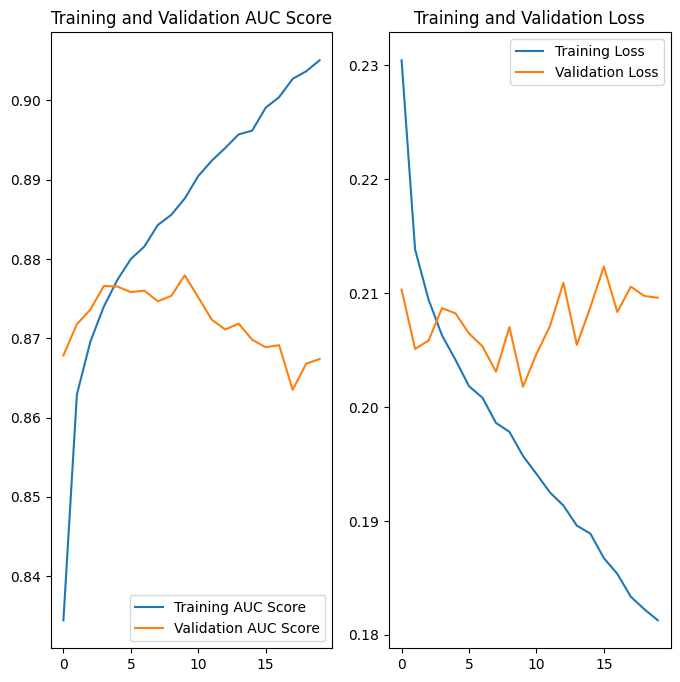

In [21]:
acc = history.history['auc']
val_acc = history.history['val_auc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training AUC Score')
plt.plot(epochs_range, val_acc, label='Validation AUC Score')
plt.legend(loc='lower right')
plt.title('Training and Validation AUC Score')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Conclusion from Model 1:
- There is a large fluctuation in the validation loss using this model.
- The recall evaluation metric is also not giving very good results

### Model 2: Using Dropouts
Here we will drop 10 percent neurons in hidden layers.

In [22]:
model2 = Sequential()

model2.add(Dense(64, input_shape=(X_train_new.shape[-1],), activation='relu'))
# using dropouts after every layer which prevents overfitting in most of the cases.
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(16, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(1, activation='sigmoid'))

In [23]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                8320      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 10,945
Trainable params: 10,945
Non-trai

In [25]:
metrics = [
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    keras.metrics.AUC(curve='ROC')
]


### Compiling the model
### choosing an appropirate optimiser and loss function
model2.compile(optimizer=keras.optimizers.Adam(0.001),
              loss='binary_crossentropy',
              metrics=metrics)

In [26]:
### Training the model
epochs = 20
batch_size = 32
history = model2.fit(X_train_new.values,y_train, validation_data = (X_test_new.values, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/20
1328/1328 [==============================] - 11s 6ms/step - loss: 0.2391 - precision: 0.5692 - recall: 0.1572 - auc_2: 0.8179 - val_loss: 0.2088 - val_precision: 0.5954 - val_recall: 0.2566 - val_auc_2: 0.8671
Epoch 2/20
1328/1328 [==============================] - 8s 6ms/step - loss: 0.2190 - precision: 0.6558 - recall: 0.2313 - auc_2: 0.8537 - val_loss: 0.2095 - val_precision: 0.6418 - val_recall: 0.2730 - val_auc_2: 0.8712
Epoch 3/20
1328/1328 [==============================] - 7s 5ms/step - loss: 0.2133 - precision: 0.6660 - recall: 0.2516 - auc_2: 0.8625 - val_loss: 0.2087 - val_precision: 0.6572 - val_recall: 0.2796 - val_auc_2: 0.8712
Epoch 4/20
1328/1328 [==============================] - 8s 6ms/step - loss: 0.2122 - precision: 0.6875 - recall: 0.2618 - auc_2: 0.8632 - val_loss: 0.2056 - val_precision: 0.6257 - val_recall: 0.3465 - val_auc_2: 0.8753
Epoch 5/20
1328/1328 [==============================] - 7s 5ms/step - loss: 0.2088 - precision: 0.6837 - recall: 0.2682

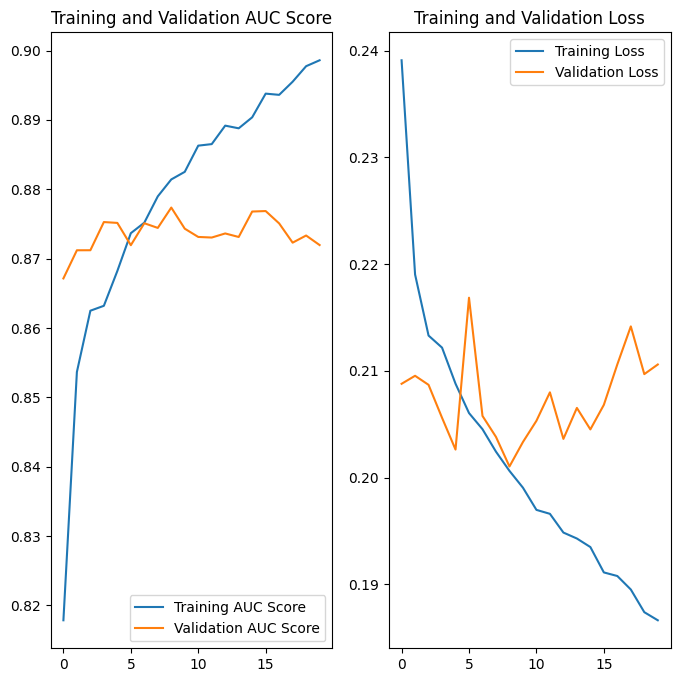

In [27]:
acc = history.history['auc_2']
val_acc = history.history['val_auc_2']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training AUC Score')
plt.plot(epochs_range, val_acc, label='Validation AUC Score')
plt.legend(loc='lower right')
plt.title('Training and Validation AUC Score')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Conclusions from Model 2:
- Although the training and validation accuracy score is acceptable using dropouts but the model is not giving good results in case of validation loss which is fluctuating more as compared to previous model.
- The recall score is very poor in this case. Thus, the model will not be able to predict actual positive values using this model. 

### Model 3: Dealing with Class Imbalance
- Class Imbalance is a major issue when dealing with classification problem since one class dominates the other class with a large number.
- Keras can be used to deal with class imbalance problem by specifying the weights to the classes.
- Class with lesser number of samples can be given more weightage as compared to dominant class.

In [32]:
model3 = Sequential()

model3.add(Dense(64, input_shape=(X_train_new.shape[-1],), activation='relu'))

model3.add(Dense(32, activation='relu'))

model3.add(Dense(16, activation='relu'))

model3.add(Dense(1, activation='sigmoid'))

In [33]:
metrics = [
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    keras.metrics.AUC(curve='ROC')
]


### Compiling the model
### choosing an appropirate optimiser and loss function
model3.compile(optimizer=keras.optimizers.Adam(0.001),
              loss='binary_crossentropy',
              metrics=metrics)

In [34]:
callbacks = [keras.callbacks.ModelCheckpoint("patient_model_at_epoch_{epoch}.h5")]
# specifying the weights for the two classes with class 1 given higher weight value than class 0 and then using this class_weight in training the model
class_weight = {0: 0.5, 1: 5}


In [35]:
### Training the model
epochs = 20
batch_size = 32
history = model3.fit(X_train_new.values,y_train, validation_data = (X_test_new.values, y_test), epochs=epochs, batch_size=batch_size, callbacks=callbacks, class_weight=class_weight)

Epoch 1/20
1328/1328 [==============================] - 9s 5ms/step - loss: 0.4408 - precision: 0.2372 - recall: 0.7618 - auc_4: 0.8417 - val_loss: 0.4440 - val_precision: 0.2492 - val_recall: 0.8015 - val_auc_4: 0.8680
Epoch 2/20
1328/1328 [==============================] - 8s 6ms/step - loss: 0.4108 - precision: 0.2479 - recall: 0.7917 - auc_4: 0.8648 - val_loss: 0.4930 - val_precision: 0.2322 - val_recall: 0.8246 - val_auc_4: 0.8718
Epoch 3/20
1328/1328 [==============================] - 7s 6ms/step - loss: 0.4055 - precision: 0.2539 - recall: 0.7936 - auc_4: 0.8684 - val_loss: 0.5128 - val_precision: 0.2144 - val_recall: 0.8432 - val_auc_4: 0.8747
Epoch 4/20
1328/1328 [==============================] - 8s 6ms/step - loss: 0.3989 - precision: 0.2596 - recall: 0.7939 - auc_4: 0.8733 - val_loss: 0.4763 - val_precision: 0.2358 - val_recall: 0.8202 - val_auc_4: 0.8744
Epoch 5/20
1328/1328 [==============================] - 8s 6ms/step - loss: 0.3901 - precision: 0.2638 - recall: 0.8064 

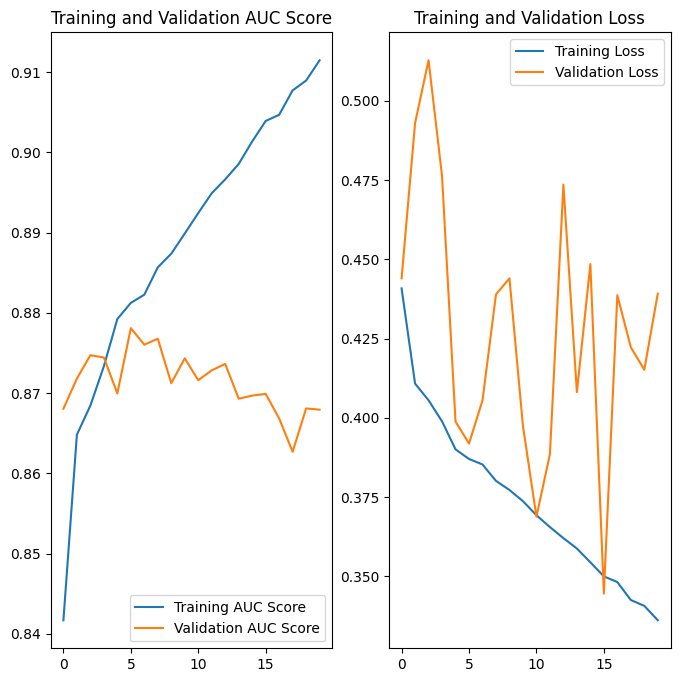

In [38]:
acc = history.history['auc_4']
val_acc = history.history['val_auc_4']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training AUC Score')
plt.plot(epochs_range, val_acc, label='Validation AUC Score')
plt.legend(loc='lower right')
plt.title('Training and Validation AUC Score')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Conclusion from model 3: 
- The precision score has improved as compared to the previous models.
- The model seems more stable with acceptable AUC score. 
- Overfitting of the model can also be avoided when after dealing with class imbalance. 

### Model 4: Using Keras Tuner
- Using Keras Tuner hyperparamter tuning can be done in deep learning models as well.
- In this case it is always advisable to focus on loss values of both the training and validation data since a model is considered more stable when the loss decreases with each epoch


In [42]:
import kerastuner as kt

<ipython-input-42-5fd8096cdee5>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [61]:
def model_builder(hp):
  model4 = keras.Sequential()
  model4.add(keras.layers.Flatten(input_shape=[129]))
  
  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512

  
  hp_units = hp.Int('units', min_value=16, max_value=256, step=16)
  model4.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model4.add(Dropout(0.1))
  model4.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model4.add(Dropout(0.1))
  model4.add(keras.layers.Dense(1, activation='sigmoid'))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  metrics = [
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    keras.metrics.AUC(curve='ROC')]

  model4.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.BinaryCrossentropy(),
                metrics=metrics)

  return model4

In [62]:
tuner = kt.RandomSearch(
    model_builder,
    objective='val_loss',
    max_trials=5)

In [63]:
 # using early stopping to stop training the model when optimal value of recall and loss values are achieved.
 stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_recall', patience=5)

In [64]:
tuner.search(X_train_new.values, y_train, epochs=30, validation_data = (X_test_new.values, y_test), callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 512 and the optimal learning rate for the optimizer
is 0.001.



### Model after using Keras Tuner with optimal learning rate and number of units.

In [65]:
model = Sequential()

model.add(Dense(512, input_shape=(X_train_new.shape[-1],), activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [66]:
metrics = [
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    keras.metrics.AUC(curve='ROC')
]


### Compiling the model
### choosing an appropirate optimiser and loss function
model.compile(optimizer=keras.optimizers.Adam(0.001),
              loss='binary_crossentropy',
              metrics=metrics)

In [69]:
### Training the model
epochs = 20
batch_size = 32
history = model.fit(X_train_new.values,y_train, validation_data = (X_test_new.values, y_test), epochs=epochs, batch_size=batch_size,callbacks=callbacks, class_weight=class_weight)

Epoch 1/20
1328/1328 [==============================] - 8s 5ms/step - loss: 0.3659 - precision: 0.3112 - recall: 0.7925 - auc_1: 0.8946 - val_loss: 0.3620 - val_precision: 0.3339 - val_recall: 0.6776 - val_auc_1: 0.8689
Epoch 2/20
1328/1328 [==============================] - 8s 6ms/step - loss: 0.3431 - precision: 0.3195 - recall: 0.8104 - auc_1: 0.9079 - val_loss: 0.4669 - val_precision: 0.2430 - val_recall: 0.8015 - val_auc_1: 0.8650
Epoch 3/20
1328/1328 [==============================] - 8s 6ms/step - loss: 0.3390 - precision: 0.3183 - recall: 0.8243 - auc_1: 0.9103 - val_loss: 0.4524 - val_precision: 0.2527 - val_recall: 0.7829 - val_auc_1: 0.8651
Epoch 4/20
1328/1328 [==============================] - 7s 5ms/step - loss: 0.3313 - precision: 0.3224 - recall: 0.8238 - auc_1: 0.9145 - val_loss: 0.3551 - val_precision: 0.3249 - val_recall: 0.6908 - val_auc_1: 0.8656
Epoch 5/20
1328/1328 [==============================] - 8s 6ms/step - loss: 0.3276 - precision: 0.3261 - recall: 0.8350 

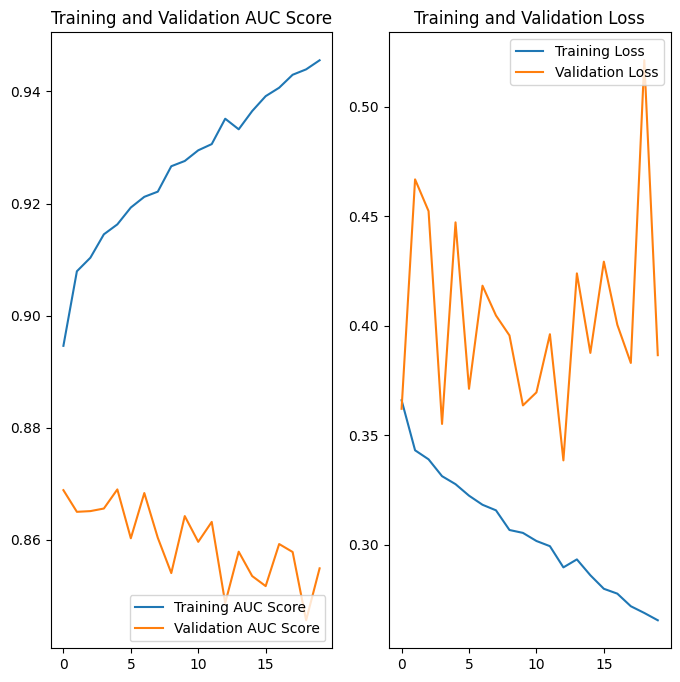

In [70]:
acc = history.history['auc_1']
val_acc = history.history['val_auc_1']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training AUC Score')
plt.plot(epochs_range, val_acc, label='Validation AUC Score')
plt.legend(loc='lower right')
plt.title('Training and Validation AUC Score')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Conclusion from the tuned Model:
- The validation loss has decreased significantly.
- The precision and recall metrics are improved to some extent.
- The model is more generalized
- learning rate and number of units used are not random but calculated using proper methods. 




From above models, it is observed that model3 is performing better. It has best validation recall score and also validation AUC. As model3 dont have any dropout layer, lets add dropout layer to avoid overfitting and check performance.

### Model 5: Model3 with dropout

In [71]:
model5 = Sequential()

model5.add(Dense(64, input_shape=(X_train_new.shape[-1],), activation='relu'))
model5.add(Dropout(0.1))
model5.add(Dense(32, activation='relu'))
model5.add(Dropout(0.1))
model5.add(Dense(16, activation='relu'))

model5.add(Dense(1, activation='sigmoid'))

In [72]:
metrics = [
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    keras.metrics.AUC(curve='ROC')
]


### Compiling the model
### choosing an appropirate optimiser and loss function
model5.compile(optimizer=keras.optimizers.Adam(0.001),
              loss='binary_crossentropy',
              metrics=metrics)

In [73]:
epochs = 20
batch_size = 32
history = model5.fit(X_train_new.values,y_train, validation_data = (X_test_new.values, y_test), epochs=epochs, batch_size=batch_size, callbacks=callbacks, class_weight=class_weight)

Epoch 1/20
1328/1328 [==============================] - 11s 7ms/step - loss: 0.4529 - precision: 0.2367 - recall: 0.7452 - auc_2: 0.8322 - val_loss: 0.4142 - val_precision: 0.2509 - val_recall: 0.7621 - val_auc_2: 0.8634
Epoch 2/20
1328/1328 [==============================] - 8s 6ms/step - loss: 0.4195 - precision: 0.2441 - recall: 0.7906 - auc_2: 0.8585 - val_loss: 0.5265 - val_precision: 0.2064 - val_recall: 0.8673 - val_auc_2: 0.8707
Epoch 3/20
1328/1328 [==============================] - 8s 6ms/step - loss: 0.4104 - precision: 0.2476 - recall: 0.7933 - auc_2: 0.8649 - val_loss: 0.4244 - val_precision: 0.2675 - val_recall: 0.7621 - val_auc_2: 0.8716
Epoch 4/20
1328/1328 [==============================] - 8s 6ms/step - loss: 0.4042 - precision: 0.2564 - recall: 0.7960 - auc_2: 0.8706 - val_loss: 0.4320 - val_precision: 0.2512 - val_recall: 0.7840 - val_auc_2: 0.8719
Epoch 5/20
1328/1328 [==============================] - 9s 7ms/step - loss: 0.3983 - precision: 0.2547 - recall: 0.8029

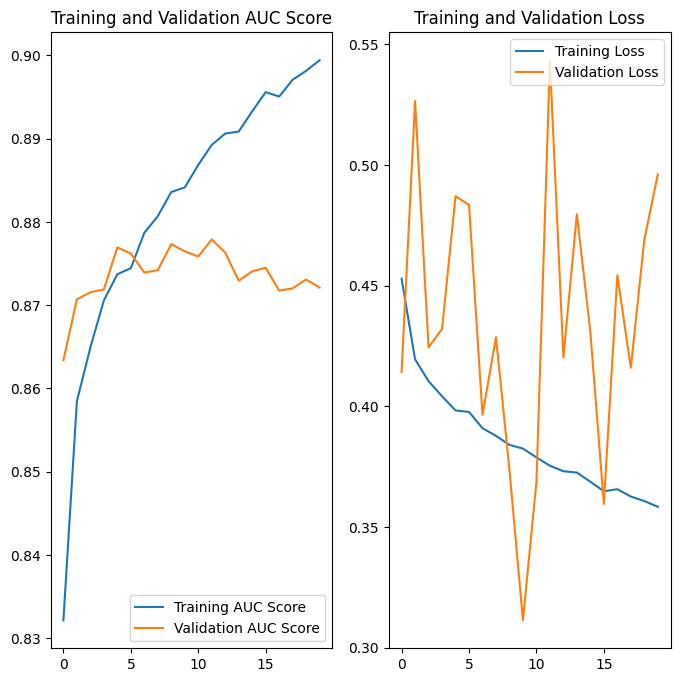

In [74]:
acc = history.history['auc_2']
val_acc = history.history['val_auc_2']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training AUC Score')
plt.plot(epochs_range, val_acc, label='Validation AUC Score')
plt.legend(loc='lower right')
plt.title('Training and Validation AUC Score')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Save model


In [75]:

from keras.models import load_model
model5.save("model.h5")
